In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
raw_data = pd.read_excel('flight_price.xlsx')

In [179]:
df = raw_data.copy()

In [180]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


#### Note: It is highly recommended to make a copy of original data and donot perform on the original dataset as sometimes the permanent changes performed on the original dataset cannot be reversed.

In [181]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [182]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [183]:
df['Airline'].nunique()

12

#### This shows that there are only 12 airlines 

### Pie chart for the Airlines

<Axes: ylabel='Airline'>

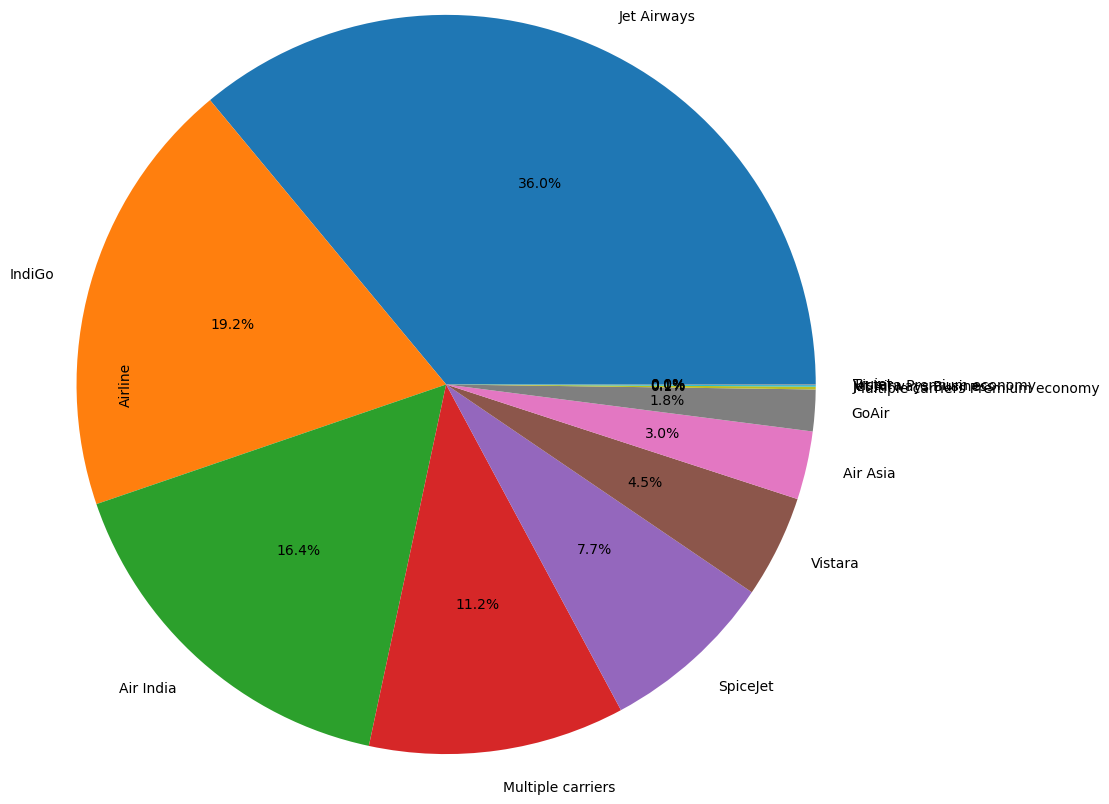

In [184]:
df['Airline'].value_counts().plot.pie(y =df['Airline'], autopct="%1.1f%%", radius=1.5,figsize=(10,8))

#### Barplot of the Airline column

<Axes: >

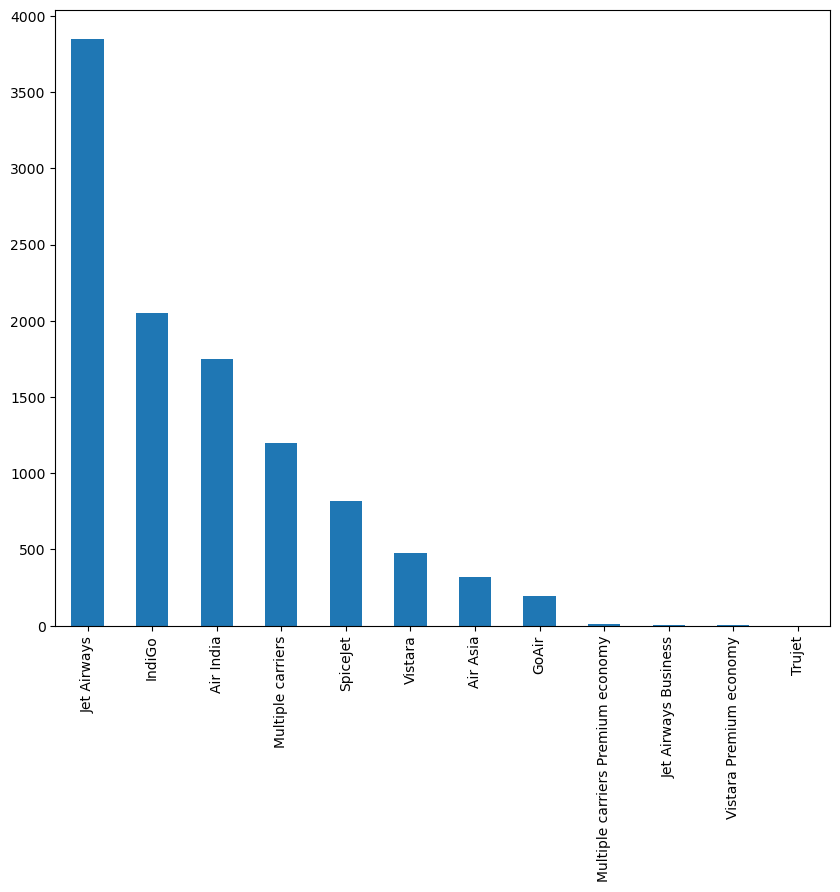

In [185]:
df['Airline'].value_counts().plot.bar(y = df['Airline'], figsize=(10,8))

In [186]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### Feature Extraction

In [187]:
df['Date_of_Journey'].isnull().sum()

0

In [188]:
## I had tried to apply the for loop I was not able to figure out the required result
# new_col = ['Date', 'Month', 'Year']
# j = 0
# for i in new_col:
#     for j in range(1):
#         df[i] = df['Date_of_Journey'].str.split('/').str[j]
#     j=j+1
    

In [189]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


#### None of the columns are empty for the Date_of_Journey column

In [190]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [191]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


### Drop the Date_of_Journey column as it is of no required now

In [192]:
df.drop(columns={'Date_of_Journey'}, axis = 1,inplace = True)

In [193]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


### Show the pie chart for different sources destination

<Axes: ylabel='Source'>

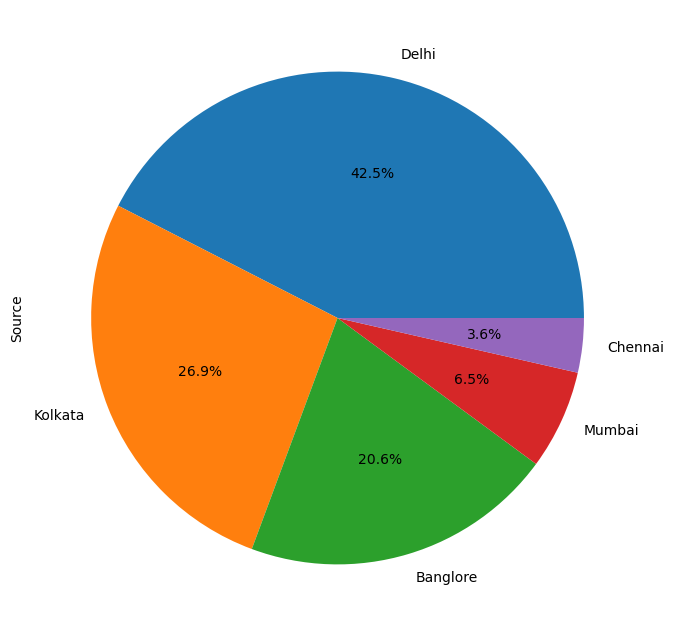

In [194]:
df['Source'].value_counts().plot.pie(y=df['Source'], figsize=(10, 8), autopct='%1.1f%%')

<Axes: >

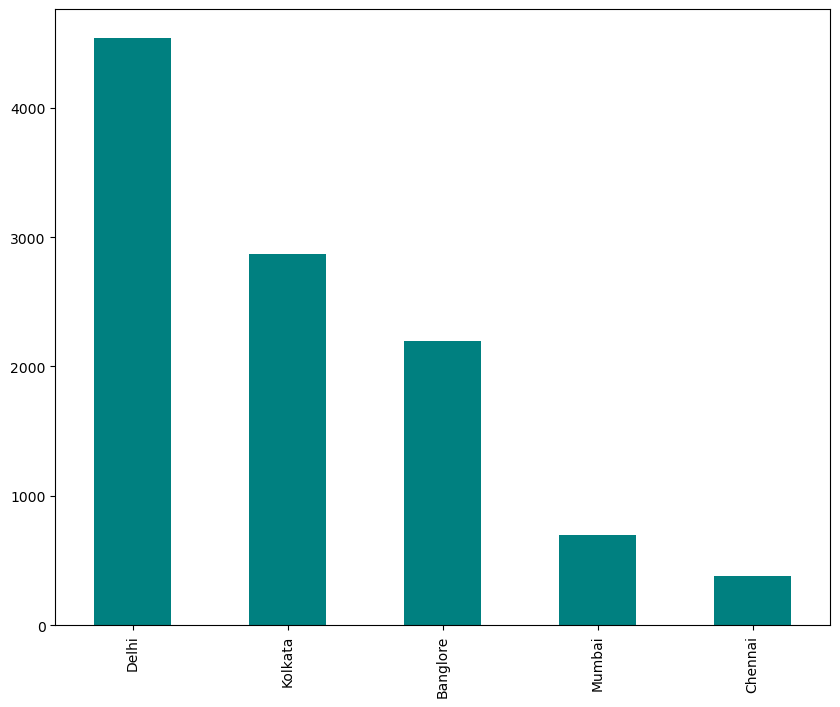

In [207]:
df['Source'].value_counts().plot.bar(y=df['Source'], figsize = (10,8), color='teal')

#### Observation:
Most of the source of the flight is from Delhi

In [208]:
df['Source'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64>

In [209]:
df.sample(4)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
358,Jet Airways,Banglore,Delhi,BLR → DEL,17:45,20:45,3h,non-stop,In-flight meal not included,7754,21,06,2019
10490,Vistara,Delhi,Cochin,DEL → COK,14:40,17:50,3h 10m,non-stop,No info,6216,27,06,2019
7079,Jet Airways,Delhi,Cochin,DEL → BDQ → BOM → COK,18:25,18:50 22 Mar,24h 25m,2 stops,No info,12347,21,03,2019
4342,Air Asia,Banglore,Delhi,BLR → DEL,04:55,07:45,2h 50m,non-stop,No info,4282,12,04,2019


In [211]:
df['Destination'].isnull().sum()

0

<Axes: >

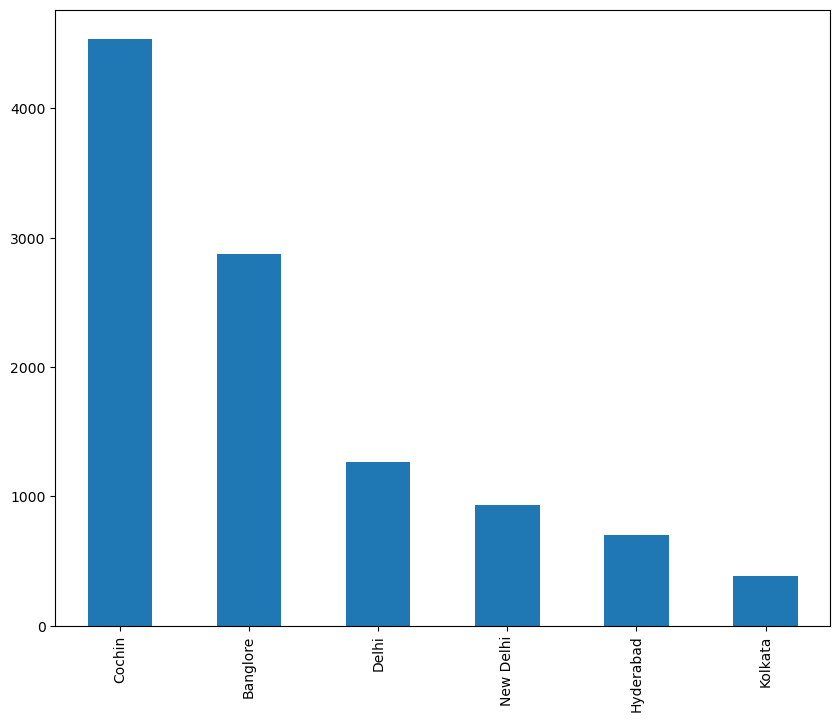

In [213]:
df['Destination'].value_counts().plot.bar(y=df['Destination'], figsize= (10,8))

<Axes: ylabel='Destination'>

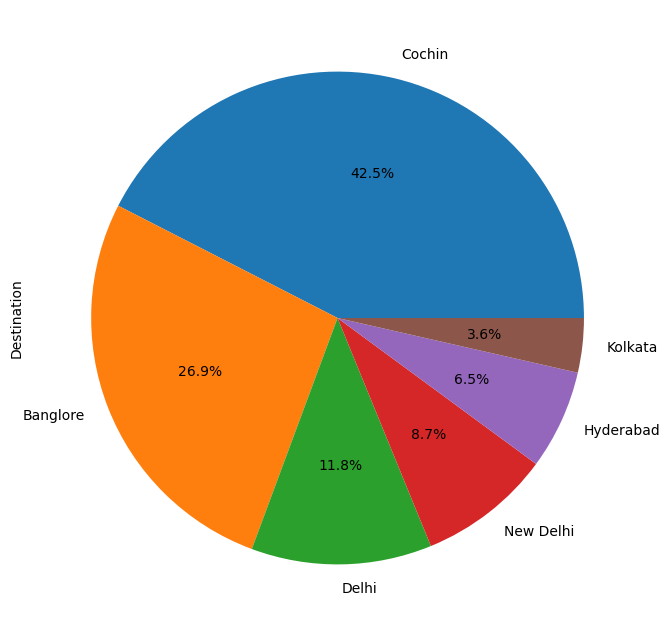

In [214]:
df['Destination'].value_counts().plot.pie(y=df['Destination'], autopct = '%1.1f%%', figsize = (10,8))

In [217]:
df['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10683, dtype: object

In [224]:
df['Dep_hour'] = df['Dep_Time'].apply(lambda x: x.split(':')[0])
df['Dep_min'] = df['Dep_Time'].apply(lambda x: x.split(':')[1])

In [225]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,hour,min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50,05,50


### Drop the Dep_time column

In [227]:
df.drop(columns={'Dep_Time'}, axis = 1, inplace = True)

In [228]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,hour,min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50,05,50


In [231]:
df['Price'].nunique()

1870

In [232]:
df.shape

(10683, 16)

In [235]:
[df.isnull().sum()]

[Airline            0
 Source             0
 Destination        0
 Route              1
 Arrival_Time       0
 Duration           0
 Total_Stops        1
 Additional_Info    0
 Price              0
 Date               0
 Month              0
 Year               0
 hour               0
 min                0
 Dep_hour           0
 Dep_min            0
 dtype: int64]

In [236]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,hour,min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50,05,50


In [240]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(" ")[0])

In [248]:
df['Arrival_hour'] = df['Arrival_Time'].str.split(":").str[0]
df['Arrival_min'] = df['Arrival_Time'].str.split(":").str[1]

In [249]:
df['Arrival_min']

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_min, Length: 10683, dtype: object